# Example 
Variable selection with Logitstep function from stepwise-regression on an binary outcome dataset.

# Load packages

In [1]:
# help packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import tree
import pandas as pd

# from stepwise-regression
from stepreg.stepreg import Logitstep

# Import data

Dataset called fraud-detection-bank-dataset-20k-records-binary which can be downloaded from
[kaggle](https://www.kaggle.com/datasets/volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary).

In [2]:
path =  # enter path of fraud-detection-bank-dataset
data = pd.read_csv (path,index_col='Unnamed: 0')
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,9,1354,0,18,0,1,7,9,0,0,...,0,0,0,1,1,0,0,0,49,1
1,0,239,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,0,260,0,4,0,3,6,0,0,0,...,0,0,0,1,1,0,0,0,56,1
3,17,682,0,1,0,0,8,17,0,0,...,0,1,0,1,1,0,0,0,65,1
4,1,540,0,2,0,1,7,1,0,0,...,0,0,0,1,1,0,0,0,175,1


In [3]:
# define target
y=data["targets"]

# define variables
X=data.drop(["targets"],axis=1)

# Train test split

Simple train test split with 33% test data.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7102020)

# check distribution of target 
print("overall:",round(y.mean()*100,2))
print("train:  ",round(y_train.mean()*100,2))
print("test:   ",round(y_test.mean()*100,2))

overall: 26.57
train:   26.63
test:    26.44


# Data preparation

In logistic regression it is crucial to prepare your data. A conventional way to do this is to bin the explanatory variables. I use sklearns DecisionTreeClassifier to do this. It is also common to do a weight of evidence transformation, but i keep it simple and just use the target rate for every bin.

In [5]:
Xbin=X
clf = tree.DecisionTreeClassifier(max_depth=3,min_impurity_decrease=0.001)
col_model = {}
for col,i in zip(X.columns, range(len(X.columns))):
    col_model[i] = clf.fit(X_train[[col]], y_train)
    Xbin[col] = col_model[i].fit(X_train[[col]], y_train).predict_proba(X[[col]])
Xbin.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
0,0.863908,0.874867,0.706804,0.942048,0.733683,0.429426,0.879849,0.863908,0.733683,0.733683,...,0.484536,0.733683,0.826676,0.733683,0.914686,0.912977,0.733683,0.7514,0.737729,0.714542
1,0.654262,0.789764,0.706804,0.688023,0.733683,0.429426,0.647247,0.654262,0.733683,0.733683,...,0.671700,0.733683,0.567803,0.733683,0.653551,0.691796,0.733683,0.7514,0.737729,0.714542
2,0.654262,0.874867,0.706804,0.942048,0.733683,0.592640,0.879849,0.654262,0.733683,0.733683,...,0.865254,0.733683,0.826676,0.733683,0.914686,0.912977,0.733683,0.7514,0.737729,0.714542
3,0.863908,0.874867,0.706804,0.688023,0.733683,0.930119,0.879849,0.863908,0.733683,0.733683,...,0.865254,0.733683,0.567803,0.733683,0.914686,0.912977,0.733683,0.7514,0.737729,0.528736
4,0.863908,0.874867,0.706804,0.942048,0.733683,0.429426,0.879849,0.863908,0.733683,0.733683,...,0.865254,0.733683,0.826676,0.733683,0.914686,0.912977,0.733683,0.7514,0.737729,0.691076


In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xbin, y, test_size=0.33, random_state=7102020)

# Model training

First of all lets try modeling with default parameters:

variable col_5 entered in step 1
variable col_111 entered in step 2
variable col_106 entered in step 3
variable col_6 entered in step 4
variable col_83 entered in step 5
variable col_54 entered in step 6
variable col_74 entered in step 7
variable col_14 entered in step 8
variable col_110 entered in step 9
variable col_102 entered in step 10
variable col_3 entered in step 11
variable col_2 entered in step 12
variable col_29 entered in step 13
variable col_107 entered in step 14
variable col_26 entered in step 15
variable col_69 entered in step 16
variable col_94 entered in step 17
variable col_1 entered in step 18
variable col_16 entered in step 19
variable col_49 entered in step 20
variable col_86 entered in step 21
variable col_72 entered in step 22
variable col_96 entered in step 23
variable col_24 entered in step 24
variable col_43 entered in step 25
variable col_36 entered in step 26
variable col_77 entered in step 27
variable col_93 entered in step 28
variable col_25 entered in st

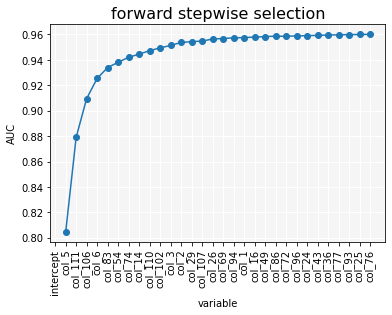

In [7]:
logit_results, logit_model, steplist = Logitstep(y_train,X_train)

By default Logitstep selects 30 variables at most including only significant variables with a p-value $\le 0.05$. 
We can set early_stopping=True to get potentially less variables in the final model.

variable col_5 entered in step 1
variable col_111 entered in step 2
variable col_106 entered in step 3
variable col_6 entered in step 4
variable col_83 entered in step 5
variable col_54 entered in step 6
variable col_74 entered in step 7
variable col_14 entered in step 8
variable col_110 entered in step 9
variable col_102 entered in step 10
variable col_3 entered in step 11
variable col_2 entered in step 12
variable col_29 entered in step 13
variable col_107 entered in step 14
variable col_26 entered in step 15
variable col_69 entered in step 16
variable col_94 entered in step 17
variable col_1 entered in step 18
variable col_16 entered in step 19
variable col_49 entered in step 20
variable col_86 entered in step 21
variable col_72 entered in step 22
variable col_96 entered in step 23
variable col_24 entered in step 24
variable col_43 entered in step 25
variable col_36 entered in step 26
variable col_77 entered in step 27
variable col_93 entered in step 28
variable col_25 entered in st

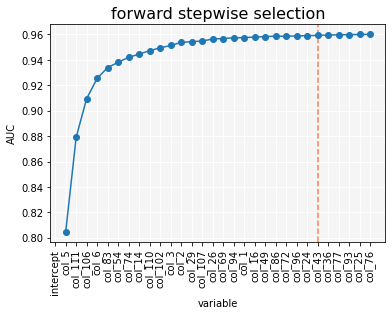

In [8]:
logit_results, logit_model, varlist = Logitstep(y_train,X_train,early_stopping=True)

The early stopping procedure stops after 25 variables, since AUC is not improving after the 5 remaining steps. You can specify the patience and tolerance of improvement to influence the variable selection. 

For example, setting patience=5 and tol=0.01 leads to the following model:

variable col_5 entered in step 1
variable col_111 entered in step 2
variable col_106 entered in step 3
variable col_6 entered in step 4
variable col_83 entered in step 5
variable col_54 entered in step 6
variable col_74 entered in step 7
variable col_14 entered in step 8
variable col_110 entered in step 9
variable col_102 entered in step 10
variable col_3 entered in step 11
variable col_2 entered in step 12
variable col_29 entered in step 13
variable col_107 entered in step 14
variable col_26 entered in step 15
variable col_69 entered in step 16
variable col_94 entered in step 17
variable col_1 entered in step 18
variable col_16 entered in step 19
variable col_49 entered in step 20
variable col_86 entered in step 21
variable col_72 entered in step 22
variable col_96 entered in step 23
variable col_24 entered in step 24
variable col_43 entered in step 25
variable col_36 entered in step 26
variable col_77 entered in step 27
variable col_93 entered in step 28
variable col_25 entered in st

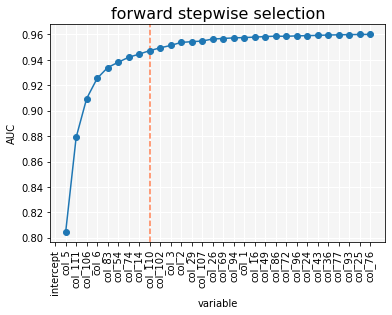

In [9]:
logit_results, logit_model, varlist = Logitstep(y_train,X_train,early_stopping=True,patience=5,tol=0.01)

Since setting this two parameters is more trial and error, one could just manual decide which variables to include in the model. Using early stopping does not influence the model output, i.e. one have to set the maxsteps parameter to the desired number of variables. Therefore we set maxsteps=15, which seems a good choice, regarding the plot.

variable col_5 entered in step 1
variable col_111 entered in step 2
variable col_106 entered in step 3
variable col_6 entered in step 4
variable col_83 entered in step 5
variable col_54 entered in step 6
variable col_74 entered in step 7
variable col_14 entered in step 8
variable col_110 entered in step 9
variable col_102 entered in step 10
variable col_3 entered in step 11
variable col_2 entered in step 12
variable col_29 entered in step 13
variable col_107 entered in step 14
variable col_26 entered in step 15
Final variable list model: ['intercept', 'col_5', 'col_111', 'col_106', 'col_6', 'col_83', 'col_54', 'col_74', 'col_14', 'col_110', 'col_102', 'col_3', 'col_2', 'col_29', 'col_107', 'col_26']
                           Logit Regression Results                           
Dep. Variable:                targets   No. Observations:                13713
Model:                          Logit   Df Residuals:                    13697
Method:                           MLE   Df Model:     

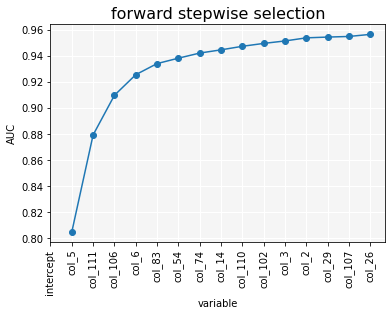

In [10]:
logit_results_final, logit_model_final, varlist_final = Logitstep(y_train,X_train,maxsteps=15)

# Model testing

Having the final model we can test it. Therfore we have to include the intercept, which is automatically included in the model. After that, we can compare the logit_model with maxtseps 30 and the logit_model_final with maxsteps=15.

In [11]:
X_test_intercept = X_test.assign(intercept = 1)
prob = logit_model.predict(X_test_intercept[varlist])
prob_final = logit_model_final.predict(X_test_intercept[varlist_final])

In [12]:
print("logit_model",round(roc_auc_score(y_test, prob)*100,2))
print("logit_model_final",round(roc_auc_score(y_test, prob_final)*100,2))

logit_model 95.41
logit_model_final 94.96


Finally, logit_model_final leads to a 0.45 smaller AUC, but has half as much variables. So it is prefered to use the logit_model_final due to the parsimonious principal.